<a href="https://colab.research.google.com/github/Anjasfedo/Learning-TensorFlow/blob/main/eat_tensorflow2_in_30_days/Chapter1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-4 Example: Modeling Procedure for Temporal Sequences

The impact of COVID-19 could be on the incomes, emotions, psychologies, and weights

This example about predicting time of COVID-19 termination in China using RNN model on TensorFlow 2

## 1. Data Preparation

The dataset is extracted from 'tushare'

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers, metrics, callbacks

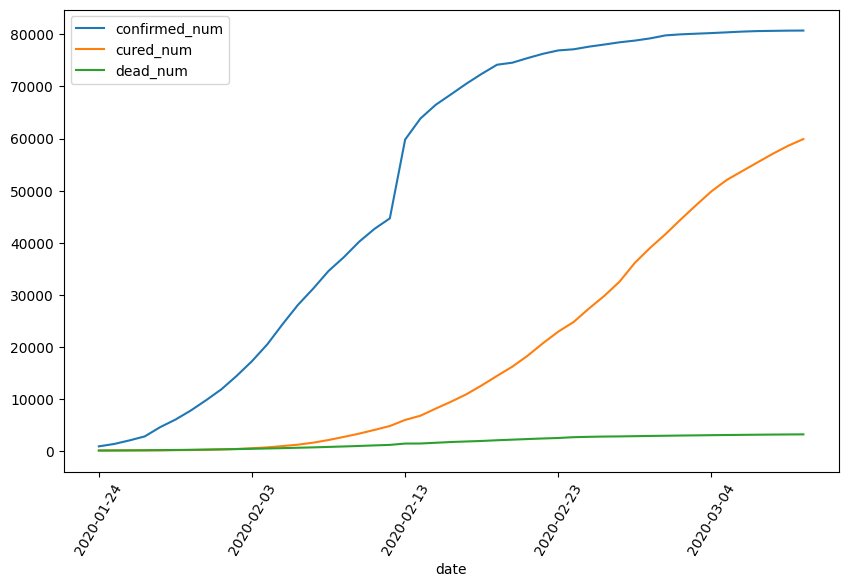

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/lyhue1991/eat_tensorflow2_in_30_days/master/data/covid-19.csv', sep='\t')

df.plot(x='date', y=['confirmed_num', 'cured_num', 'dead_num'], figsize=(10, 6))

plt.xticks(rotation=60)
plt.show()

In [18]:
dfdata = df.set_index('date')
dfdiff = dfdata.diff(periods=1).dropna()
dfdiff = dfdiff.reset_index()
dfdiff.head()

,date,confirmed_num,cured_num,dead_num
0,2020-01-25,457.0,4.0,16.0
1,2020-01-26,688.0,11.0,15.0
2,2020-01-27,769.0,2.0,24.0
3,2020-01-28,1771.0,9.0,26.0
4,2020-01-29,1459.0,43.0,26.0


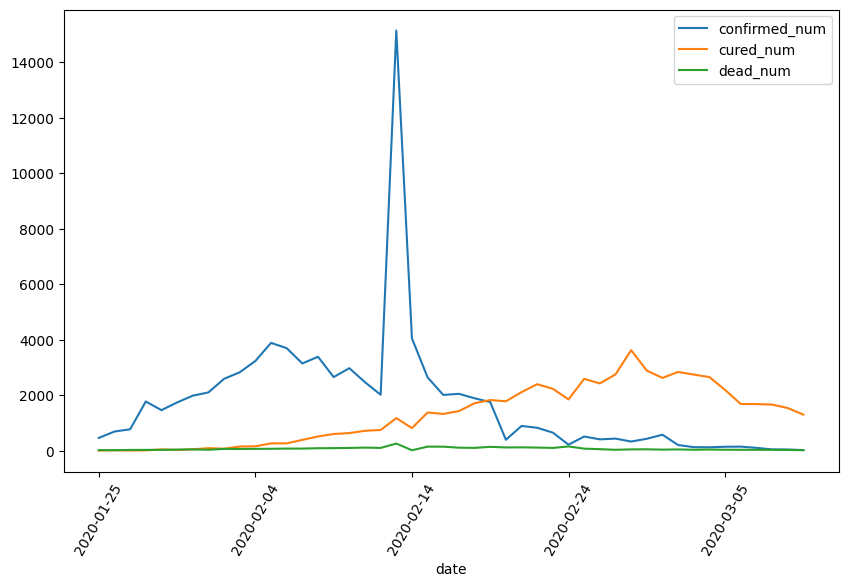

In [19]:
dfdiff.plot(x='date', y=['confirmed_num', 'cured_num', 'dead_num'], figsize=(10, 6))

plt.xticks(rotation=60)
plt.show()

In [20]:
dfdiff = dfdiff.drop("date",axis = 1).astype("float32")
dfdiff.head()

,confirmed_num,cured_num,dead_num
0,457.0,4.0,16.0
1,688.0,11.0,15.0
2,769.0,2.0,24.0
3,1771.0,9.0,26.0
4,1459.0,43.0,26.0


In [21]:
# Use data of an eight-day window priorier of date that are investigating as input for prediction
WINDOW_SIZE = 8

In [22]:
def batch_dataset(dataset):
  dataset_batched = dataset.batch(WINDOW_SIZE, drop_remainder=True)
  return dataset_batched

In [26]:
ds_data = tf.data.Dataset.from_tensor_slices(tf.constant(dfdiff.values, dtype=tf.float32)) \
          .window(WINDOW_SIZE, shift=1) \
          .flat_map(batch_dataset)

ds_label = tf.data.Dataset.from_tensor_slices(tf.constant(dfdiff.values[:WINDOW_SIZE], dtype=tf.float32))

# Put all data into one batch for better efficiency since the data volume is small
ds_train = tf.data.Dataset.zip((ds_data, ds_label)).batch(38).cache()